In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from LinearMPC.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl
import numpy as np
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [8]:
Ts = 0.05
sim_time = 20
H = 10.0
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 100])  # initial state
pos_target = np.array([0, 0, 10.0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
pos_controller = PIControl(pos_target)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, pos_control=pos_controller, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 0.8
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
);

Computing maximum invariant set ...
Maximum invariant set successfully computed after 10 iterations.
Computing maximum invariant set ...
Maximum invariant set successfully computed after 9 iterations.
Computing maximum invariant set ...
Maximum invariant set successfully computed after 1 iterations.
Computing maximum invariant set ...
Maximum invariant set successfully computed after 24 iterations.


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', interval=125, max=399, step=2), Int…

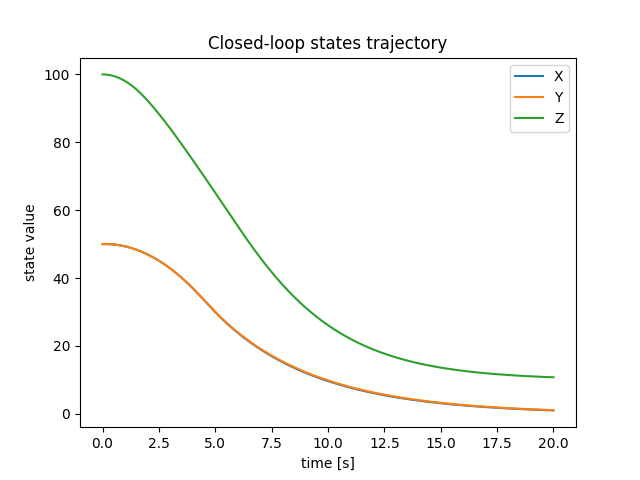

In [12]:
from LinearMPC.utils import X, Y, Z, X_TO_STRING
import matplotlib.pyplot as plt

x_ids = np.array([X, Y, Z])
legend = X_TO_STRING[x_ids]
plt.figure()
plt.plot(t_cl, np.transpose(x_cl[x_ids]))
plt.title("Closed-loop states trajectory")
plt.legend(legend)
plt.xlabel("time [s]")
plt.ylabel("state value")
plt.show()